## Decision Tree for Fraud Check

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [5]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [43]:
fraudcheck = fraud.copy()

In [44]:
fraudcheck["income"]=  " <=30000"
fraudcheck.loc[fraudcheck["Taxable.Income"]>=30000,"income"]="Good"
fraudcheck.loc[fraudcheck["Taxable.Income"]<=30000,"income"]="Risky"

In [45]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [46]:
fraudcheck['income'].unique()

array(['Good', 'Risky'], dtype=object)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

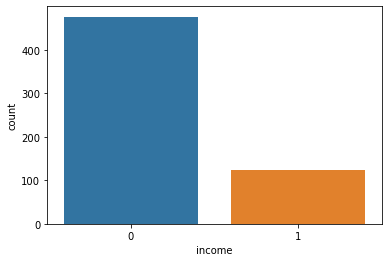

In [69]:
sns.countplot(fraudcheck['income'])

In [48]:
fraudcheck.drop(["Taxable.Income"],axis=1,inplace=True)

In [49]:
fraudcheck.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"citypop","Work.Experience":"exp","Urban":"urban"},inplace=True)
fraudcheck

,undergrad,marital,citypop,exp,urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [56]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
income             object
dtype: object

In [155]:
from sklearn import preprocessing
labelEncod=preprocessing.LabelEncoder()
for column_name in fraudcheck.columns:
    if fraudcheck[column_name].dtype == object:
        fraudcheck[column_name] = labelEncod.fit_transform(fraudcheck[column_name])
    else:
        pass

In [54]:
features = fraudcheck.iloc[:,0:5]
labels = fraudcheck.iloc[:,5]
fraudcheck

,undergrad,marital,citypop,exp,urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [52]:
features.head()

,undergrad,marital,citypop,exp,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [66]:
print(features['undergrad'].value_counts())  ## 0 = No, 1 = Yes
print(features['marital'].value_counts())    ## 0= Divorced, 1=Married , 2 = Single
print(features['exp'].value_counts())
print(features['urban'].value_counts())     ## 0 = No, 1 = Yes
print(labels.value_counts())    ## 0 = Good, 1 = Risky

1    312
0    288
Name: undergrad, dtype: int64
2    217
1    194
0    189
Name: marital, dtype: int64
10    31
13    28
12    25
30    25
28    25
14    24
11    23
21    23
26    22
5     22
27    22
7     21
19    21
29    21
25    19
2     19
6     19
16    19
15    18
17    18
24    17
23    16
20    15
8     14
4     14
3     14
1     14
0     14
9     13
22    13
18    11
Name: exp, dtype: int64
1    302
0    298
Name: urban, dtype: int64
0    476
1    124
Name: income, dtype: int64


In [53]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='undergrad', ylabel='count'>

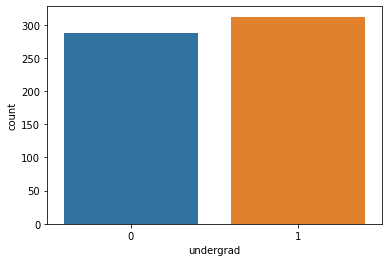

In [68]:
sns.countplot(features['undergrad'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

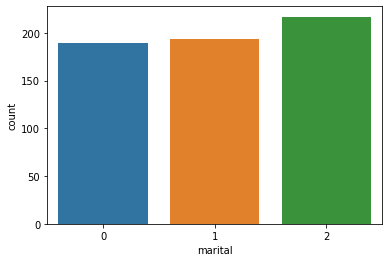

In [79]:
sns.countplot(features['marital'])  ## Singles are more


In [73]:
? sns.countplot

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='marital', ylabel='Density'>

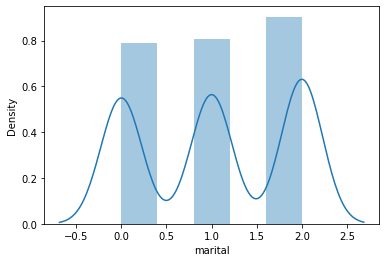

In [84]:
sns.distplot(features['marital'])
## plt.hist(features['marital'])

In [94]:
colnames = list(fraudcheck.columns)
colnames

['undergrad', 'marital', 'citypop', 'exp', 'urban', 'income']

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,random_state = 40)


### Building the Decision tree classifier using CART (GiniIndex) criterion

In [141]:
## Building the Decision tree classifier usint GiniIndex criterion
model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 15)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15)

[Text(387.5, 679.5, 'citypop <= 60294.5\ngini = 0.32\nsamples = 420\nvalue = [336, 84]\nclass = good'),
 Text(242.1875, 528.5, 'citypop <= 40128.5\ngini = 0.187\nsamples = 86\nvalue = [77, 9]\nclass = good'),
 Text(145.3125, 377.5, 'exp <= 18.5\ngini = 0.339\nsamples = 37\nvalue = [29, 8]\nclass = good'),
 Text(96.875, 226.5, 'citypop <= 36940.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = good'),
 Text(48.4375, 75.5, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]\nclass = good'),
 Text(145.3125, 75.5, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = risky'),
 Text(193.75, 226.5, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = good'),
 Text(339.0625, 377.5, 'marital <= 0.5\ngini = 0.04\nsamples = 49\nvalue = [48, 1]\nclass = good'),
 Text(290.625, 226.5, 'exp <= 17.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = good'),
 Text(242.1875, 75.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = good'),
 Text(339.0625, 75.5, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\n

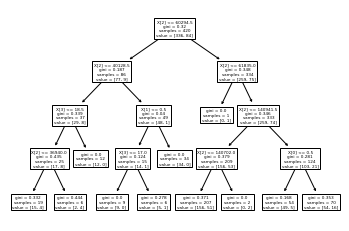

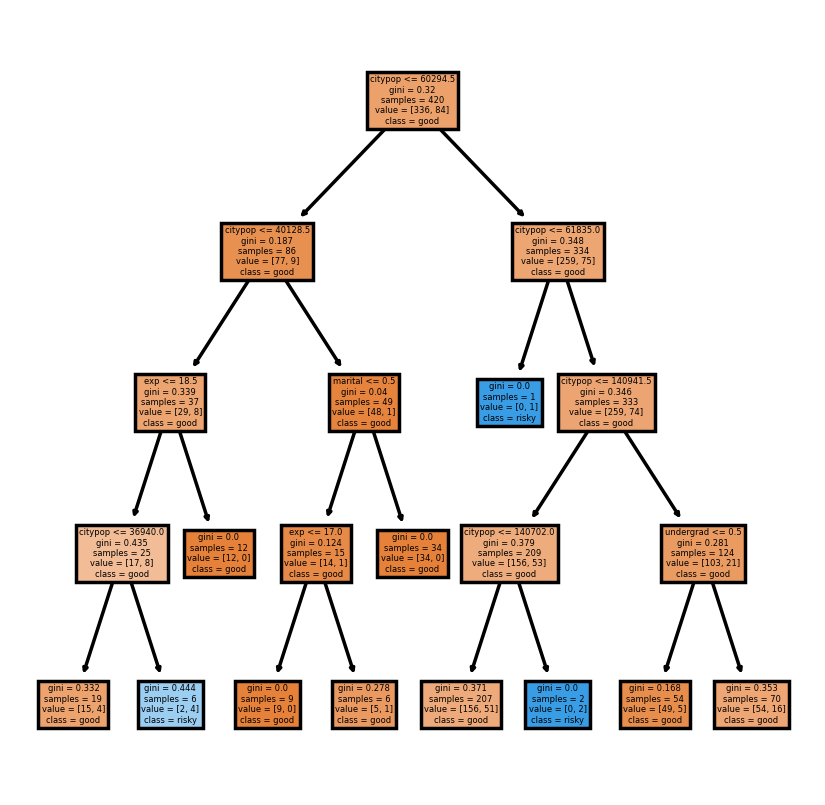

In [142]:
## Plot the decision tree for our model
tree.plot_tree(model)
fn = ['undergrad','marital','citypop','exp','urban']
cn = ['good','risky']

fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 250)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True)


In [143]:
## Predicting on test data
pred = model.predict(x_test)
pd.Series(pred).value_counts()

0    178
1      2
dtype: int64

In [144]:
pd.crosstab(y_test, pred)

col_0,0,1
income,,
0,138,2
1,40,0


In [145]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       140
           1       0.00      0.00      0.00        40

    accuracy                           0.77       180
   macro avg       0.39      0.49      0.43       180
weighted avg       0.60      0.77      0.68       180



In [146]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       336
           1       0.78      0.08      0.15        84

    accuracy                           0.81       420
   macro avg       0.80      0.54      0.52       420
weighted avg       0.81      0.81      0.75       420



#### Building the Decision tree classifier usint Entropy criterion

In [147]:
## Building the Decision tree classifier usint Entropy criterion
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4, max_leaf_nodes = 15)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=15)

[Text(470.5357142857143, 679.5, 'citypop <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]\nclass = good'),
 Text(276.7857142857143, 528.5, 'citypop <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]\nclass = good'),
 Text(166.07142857142856, 377.5, 'exp <= 18.5\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]\nclass = good'),
 Text(110.71428571428571, 226.5, 'citypop <= 36940.0\nentropy = 0.904\nsamples = 25\nvalue = [17, 8]\nclass = good'),
 Text(55.357142857142854, 75.5, 'entropy = 0.742\nsamples = 19\nvalue = [15, 4]\nclass = good'),
 Text(166.07142857142856, 75.5, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = risky'),
 Text(221.42857142857142, 226.5, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = good'),
 Text(387.5, 377.5, 'marital <= 0.5\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]\nclass = good'),
 Text(332.1428571428571, 226.5, 'exp <= 17.0\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]\nclass = good'),
 Text(276.7857142857143, 75.5, 'en

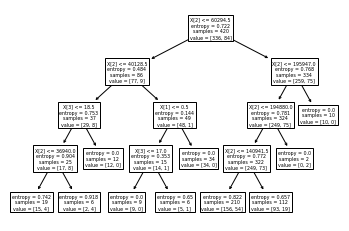

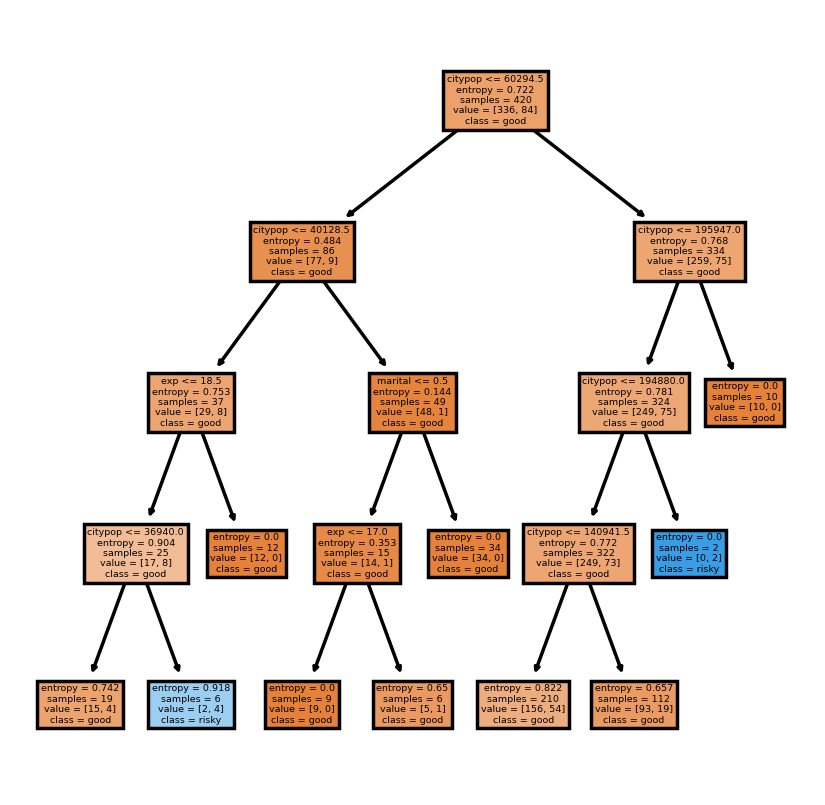

In [148]:
## Plot the decision tree for Entropy model
tree.plot_tree(model1)
fn = ['undergrad','marital','citypop','exp','urban']
cn = ['good','risky']

fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 250)
tree.plot_tree(model1, feature_names = fn, class_names = cn, filled = True)

In [149]:
## Predicting on test data
pred = model1.predict(x_test)
pd.Series(pred).value_counts()

0    177
1      3
dtype: int64

In [150]:
pd.crosstab(y_test, pred)

col_0,0,1
income,,
0,137,3
1,40,0


In [151]:
pred_train = model1.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       336
           1       0.75      0.07      0.13        84

    accuracy                           0.81       420
   macro avg       0.78      0.53      0.51       420
weighted avg       0.80      0.81      0.74       420



In [152]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       140
           1       0.00      0.00      0.00        40

    accuracy                           0.76       180
   macro avg       0.39      0.49      0.43       180
weighted avg       0.60      0.76      0.67       180



In [153]:
## Using Entropy and GiniIndex(CART) criterion we are getting same accuracies for train and test